# <center> <u> Interest Rate Dynamics </u> </center> 

In [1]:
import requests
import yfinance as yf
import numpy as np
import pandas as pd 

from numba import jit, prange
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression

## <center> Set Seaborn Theme </center>

In [2]:
sns.set_theme(
    style = "darkgrid",
    palette = "bright",
)

plt.rc('figure', figsize = (10, 5))

## <center> Fetch Treasury Data </center> 

In [3]:
resp = requests.get("https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v2/accounting/od/avg_interest_rates")

In [4]:
json = resp.json()

In [5]:
data = json["data"]

In [6]:
[(d['security_desc'], d["avg_interest_rate_amt"]) for d in data if d['security_desc'] == "Treasury Notes"]

[('Treasury Notes', '6.096'),
 ('Treasury Notes', '6.076'),
 ('Treasury Notes', '6.088'),
 ('Treasury Notes', '6.066'),
 ('Treasury Notes', '6.021'),
 ('Treasury Notes', '6.018'),
 ('Treasury Notes', '5.975')]

## <center> Parse Treasury Data </center> 

In [7]:
df = pd.read_csv("Data/AvgInterestRate.csv")

In [8]:
df.head()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31
1,2023-08-31,Marketable,Treasury Notes,2.077,2,2023,4,2023,3,8,31
2,2023-08-31,Marketable,Treasury Bonds,3.045,3,2023,4,2023,3,8,31
3,2023-08-31,Marketable,Treasury Inflation-Protected Securities (TIPS),0.581,4,2023,4,2023,3,8,31
4,2023-08-31,Marketable,Treasury Floating Rate Notes (FRN),5.205,5,2023,4,2023,3,8,31


In [9]:
df.tail()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
4397,2001-01-31,Non-marketable,United States Savings Securities,6.224,12,2001,2,2001,1,1,31
4398,2001-01-31,Non-marketable,Government Account Series,6.650,13,2001,2,2001,1,1,31
4399,2001-01-31,Non-marketable,Total Non-marketable,6.567,14,2001,2,2001,1,1,31
4400,2001-01-31,Interest-bearing Debt,Total Interest-bearing Debt,6.594,15,2001,2,2001,1,1,31
4401,2001-01-31,Marketable,Treasury Bills,6.059,1,2001,2,2001,1,1,31


In [10]:
df["Security Description"].unique()

array(['Treasury Bills', 'Treasury Notes', 'Treasury Bonds',
       'Treasury Inflation-Protected Securities (TIPS)',
       'Treasury Floating Rate Notes (FRN)', 'Federal Financing Bank',
       'Total Marketable', 'Domestic Series', 'Special Purpose Vehicle',
       'Foreign Series', 'State and Local Government Series',
       'United States Savings Securities',
       'United States Savings Inflation Securities',
       'Government Account Series',
       'Government Account Series Inflation Securities',
       'Total Non-marketable', 'Total Interest-bearing Debt',
       'Hope Bonds', 'R.E.A. Series', 'Treasury Inflation-Indexed Notes',
       'Treasury Inflation-Indexed Bonds', 'TotalMarketable'],
      dtype=object)

In [11]:
bills_df = df[df["Security Description"] == 'Treasury Bills']

In [12]:
bills_df.head()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2023-08-31,Marketable,Treasury Bills,5.319,1,2023,4,2023,3,8,31
17,2023-07-31,Marketable,Treasury Bills,5.219,1,2023,4,2023,3,7,31
34,2023-06-30,Marketable,Treasury Bills,5.116,1,2023,3,2023,2,6,30
51,2023-05-31,Marketable,Treasury Bills,4.991,1,2023,3,2023,2,5,31
68,2023-04-30,Marketable,Treasury Bills,4.739,1,2023,3,2023,2,4,30


In [13]:
bills_df.tail()

,Record Date,Security Type Description,Security Description,Average Interest Rate Amount,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
4324,2001-05-31,Marketable,Treasury Bills,4.560,1,2001,3,2001,2,5,31
4340,2001-04-30,Marketable,Treasury Bills,5.076,1,2001,3,2001,2,4,30
4358,2001-03-31,Marketable,Treasury Bills,5.369,1,2001,2,2001,1,3,31
4372,2001-02-28,Marketable,Treasury Bills,5.755,1,2001,2,2001,1,2,28
4401,2001-01-31,Marketable,Treasury Bills,6.059,1,2001,2,2001,1,1,31


In [18]:
interest_rate = bills_df["Average Interest Rate Amount"].to_numpy()[::-1] / 100

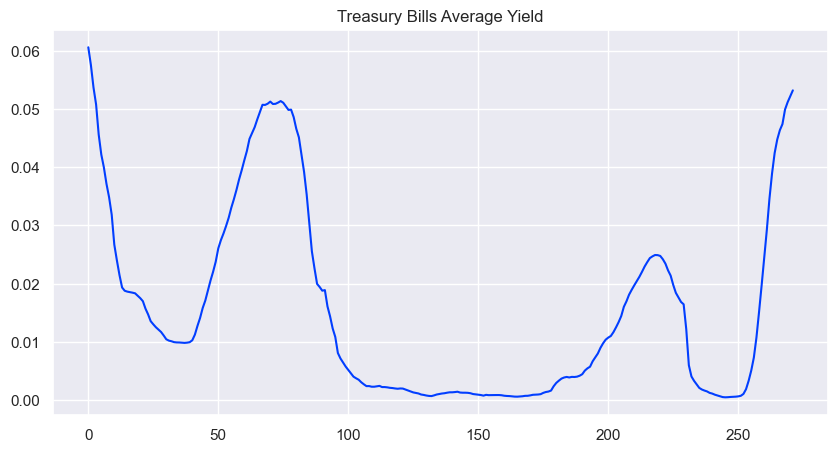

In [19]:
ax = sns.lineplot(
    interest_rate
)

ax.set(
    title = "Treasury Bills Average Yield"
)

plt.show()

## <center> Three Month Treasury Bill </center> 

## <center> $ P = \frac{FV}{(1 + i)^{N}} $ </center>

In [20]:
@jit(nopython = True)
def compute_treasury_bill_price(yield_arr):
    """
    
    """
    
    FV = 100
    N = len(yield_arr)
    P = np.copy(yield_arr)
    
    for i in range(N):
        P[i] = 100 / (1 + yield_arr[i])
    
    return P

In [22]:
prices = compute_treasury_bill_price(interest_rate)

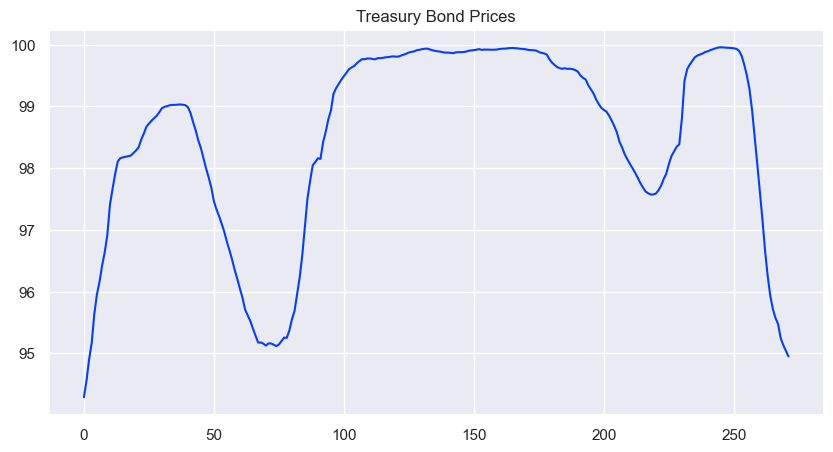

In [25]:
ax = sns.lineplot(
    prices
)

ax.set(
    title = "Treasury Bond Prices"
)

plt.show()